In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import cv2

# Load Image

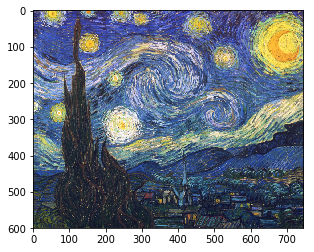

In [32]:
img = cv2.imread('data/starry_starry_night.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (0, 0), fx=.5, fy=.5 )
plt.imshow(img)

# Method 1: Mult

In [33]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_mult.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 30
#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
deltas = []
inverses = []

for _ in range(3):
    for i in range(N):
        
        delta = np.random.normal(loc=1, scale=.03, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)

        dimg = np.multiply(myimg, delta)
        myimg = dimg

        vid.write(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR))
        deltas.append(delta)
        inverses.append(1.0/delta)

    for inv in reversed(inverses):

        dimg = np.multiply(myimg, inv)
        myimg = dimg
        vid.write(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR))

    
vid.release()

KeyboardInterrupt: 

# Method Two: Basic Addition

In [ ]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_basic_add.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 45
high = 4

#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
deltas = []
inverses = []
sign = np.random.choice([-1, 1])

for j in range(3):
    
    sign = np.random.choice([-1, 1])

    
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        delta = np.random.normal(loc=0, scale=2, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        
        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        deltas.append(delta)
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

# Method Three: Shift the Normal

In [ ]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_basic_add_shifted.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 45
high = 4

#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
deltas = []
inverses = []
sign = np.random.choice([-1, 1])

for j in range(3):
    
    sign = np.random.choice([-1, 1])

    
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        delta = np.random.normal(loc=3, scale=1, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        
        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        deltas.append(delta)
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

# Method 3: Add Sign Variable

In [ ]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_sign.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 45
high = 4

#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
inverses = []
for j in range(3):
    
    sign = np.random.choice([-1, 1])

    
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        delta = sign*np.random.normal(loc=3, scale=1, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        
        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

# Method 4: Add Randomization to Normal Distribution

In [ ]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_final.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 45
high = 4

#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
inverses = []
sign = np.random.choice([-1, 1])

for j in range(3):
    
    sign = np.random.choice([-1, 1])

    
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        med = np.random.uniform(low=1, high=high)
        delta = sign*np.random.normal(loc=med, scale=med/2, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        
        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

# Try Slowing transformation down

In [34]:
# Init Video Object
height, width, ndims = img.shape
vid = cv2.VideoWriter('blog_vids/starry_final_slow.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 15, (width, height), isColor=True)

# Hyper Params
N = 45
high = 2

myimg = np.copy(img)
inverses = []
sign = np.random.choice([-1, 1])

for j in range(3):
    
    sign = np.random.choice([-1, 1])
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        # Get Delta Matrix
        med = np.random.uniform(low=1, high=high)
        delta = sign*np.random.normal(loc=med, scale=med/2, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        # Update Image
        dimg = myimg + delta
        myimg = dimg
        
        # Write to Video
        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        inverses.append(-1*delta)
    
    # Add Inverses to revert to Original
    for inv in reversed(inverses):
        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()